In [1]:
# Import necessary libraries
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pl.Config.set_tbl_cols(100) 


polars.config.Config

In [2]:
schema_overrides={"incident_zip": pl.Utf8}

df = pl.read_csv(
    "../NYC_311_Data/outputs/nyc_311_features.csv",
    schema_overrides=schema_overrides,
    null_values=["NA", "N/A", "null", "","Unknown"],  # Treat these as missing
    infer_schema_length=1000000
)


## QA Check

In [3]:
df.shape

(26169759, 163)

In [ ]:
# Get the total number of rows
total_rows = df.height

# Compute missing values count
missing_counts = df.select([pl.col(col).is_null().sum().alias(col) for col in df.columns])

# Convert counts to Float64 for compatibility
missing_counts = missing_counts.with_columns(pl.all().cast(pl.Float64))

# Compute missing value percentages
missing_percentages = missing_counts * 100 / total_rows

# Keep only columns where there are missing values
filtered_counts = missing_counts.select([col for col in missing_counts.columns if missing_counts.select(col).row(0)[0] > 0])
filtered_percentages = missing_percentages.select([col for col in missing_percentages.columns if missing_counts.select(col).row(0)[0] > 0])

# Combine both counts and percentages
missing_summary = pl.concat([filtered_counts, filtered_percentages], how="diagonal")

missing_summary


In [4]:
df = df.with_columns(pl.col('location_type').fill_null("Unknown"))

In [5]:
# Drop rows with missing values in key columns
key_columns = [
    'descriptor', 'incident_zip', '7_day_avg_complaints', '30_day_avg_complaints',
    '7_day_avg_response', '30_day_avg_response', '7_day_avg_type_complaints',
    '30_day_avg_type_complaints', '7_day_avg_borough_complaints', '30_day_avg_borough_complaints'
]
df = df.drop_nulls(subset=key_columns)

In [ ]:
print("Cleaned dataset shape:", df.shape)

In [ ]:
# save polars dataframe to csv
df.write_csv("../NYC_311_Data/outputs/nyc_311_eda_cleaned.csv")

## Basic EDA

In [6]:
summary_stats = df.describe()

In [7]:
summary_stats

statistic,created_date,agency,complaint_type,descriptor,location_type,incident_zip,borough,x_coordinate_state_plane,open_data_channel_type,latitude,longitude,community_board,response_time_hours,day_of_week,hour,month,week_number,is_weekend,is_rush_hour,is_holiday,season,time_of_day,borough_BRONX,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,borough_Unspecified,zip_complaint_freq,agency_freq,complaint_type_freq,descriptor_freq,date,daily_complaints,7_day_avg_complaints,30_day_avg_complaints,daily_avg_response,7_day_avg_response,30_day_avg_response,daily_type_complaints,7_day_avg_type_complaints,30_day_avg_type_complaints,daily_borough_complaints,7_day_avg_borough_complaints,30_day_avg_borough_complaints,precipitation,snowfall,snow_depth,max_temperature,min_temperature,fog,heavy_fog,thunder,ice_pellets,hail,glaze,dust,smoke_haze,blowing_snow,high_winds,mist,drizzle,rain,freezing_rain,snow,unknown_precip,ice_fog
str,str,str,str,str,str,str,str,f64,str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""30561281""","""30561281""","""30561281""","""30561281""","""30561281""","""30561281""","""30561281""",3.0561281e7,"""30561281""",3.0561281e7,3.0561281e7,"""30561281""",3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,"""30561281""","""30561281""",3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,"""30561281""",3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7,3.0561281e7
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,"""0""",0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,null,null,null,null,null,919422.550551,null,40.732813,-73.92261,null,242.216751,3.877441,12.229642,6.551198,26.647988,0.255703,0.204073,0.028058,null,null,0.198027,0.308806,0.192877,0.240054,0.048372,0.011864,242849.172782,6.8693e6,1.2022e6,809022.513608,null,6901.788954,6775.3741,6734.271144,238.840364,235.539601,236.419506,483.462024,412.84375,389.810927,1666.589868,1622.777673,1606.952083,3.488347,1.721717,7.790258,17.593139,9.774172,0.347081,0.028579,0.047988,0.001086,0.006652,0.004604,0.002113,0.173619,0.000384,0.000136,0.037836,0.0001,0.039298,0.000488,0.008755,0.003578,0.001281
"""std""",null,null,null,null,null,null,null,249441.526504,null,0.087369,0.080283,null,751.289235,1.975081,6.815953,3.452436,15.050727,null,null,null,null,null,0.398513,0.462001,0.394557,0.427116,0.214551,0.108274,114612.970189,4.0880e6,1.1373e6,1.1764e6,null,2113.25962,1928.762737,1854.537926,80.514801,58.324668,54.670188,671.806386,507.404096,440.922625,744.961608,668.86149,635.603036,10.085466,17.190598,43.186191,10.11665,9.313629,0.476042,0.166619,0.213742,0.032935,0.081286,0.067695,0.045921,0.378782,0.019593,0.011675,0.190801,0.010022,0.194303,0.022096,0.093156,0.059713,0.035773
"""min""","""2010-06-14T00:00:00.000000""","""3-1-1""","""AHV Inspection Unit""","""1 Missed Collection""","""1-, 2- and 3- Family Home""","""0""","""BRONX""",121102.0,"""MOBILE""",40.498044,-74.255211,"""0 Unspecified""",0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,"""Fall""","""Afternoon""",0.0,0.0,0.0,0.0,0.0,0.0,1.0,445.0,38.0,1.0,"""2010-06-14""",9.0,2208.285714,3149.033333,0.373042,9.495754,30.

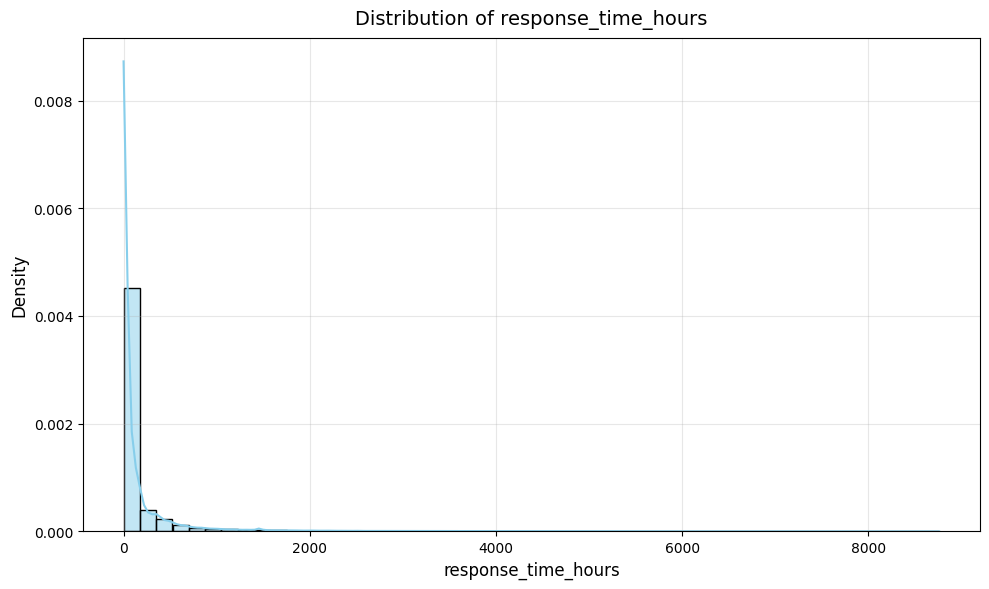

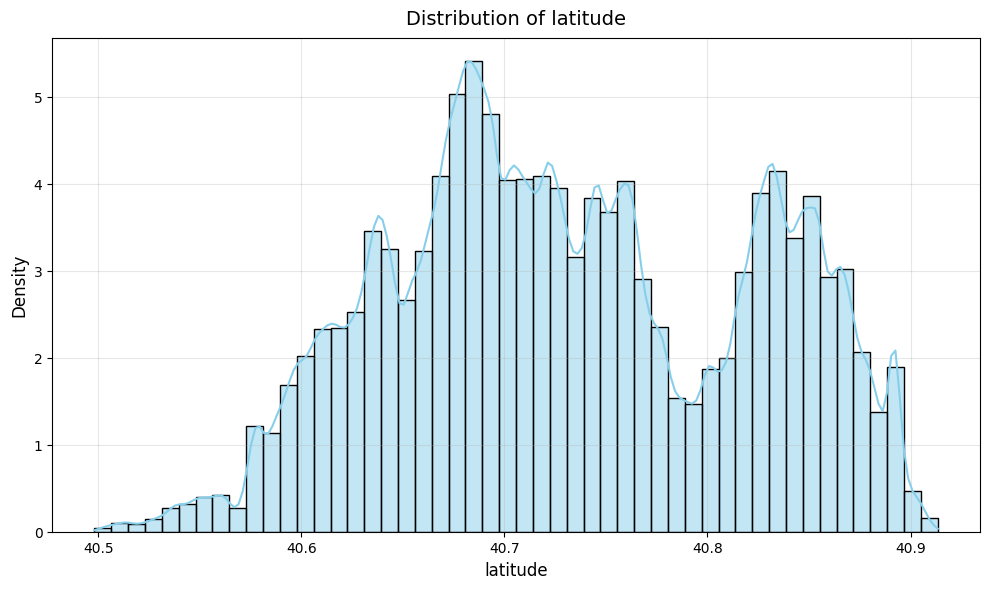

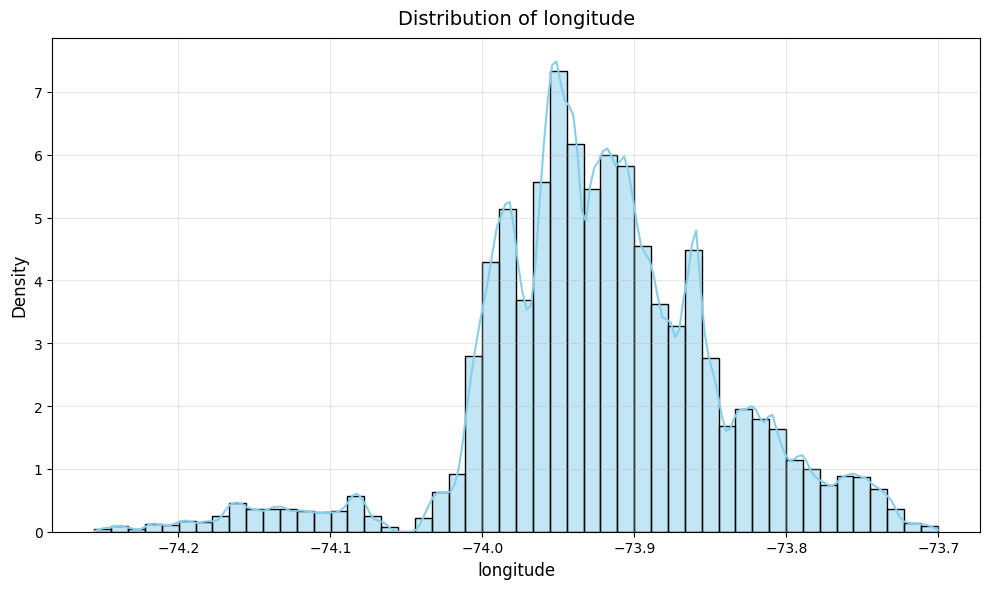

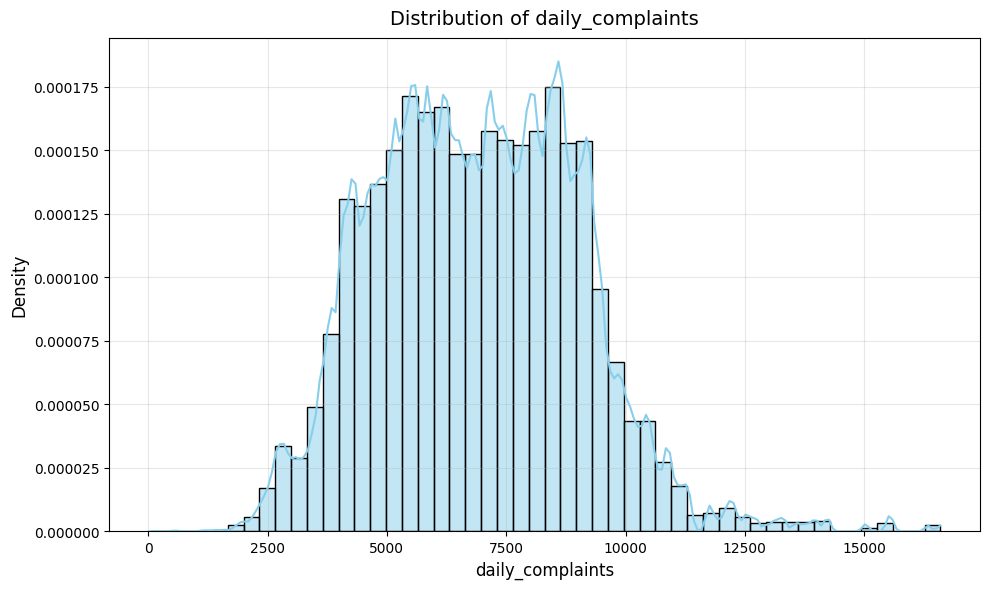

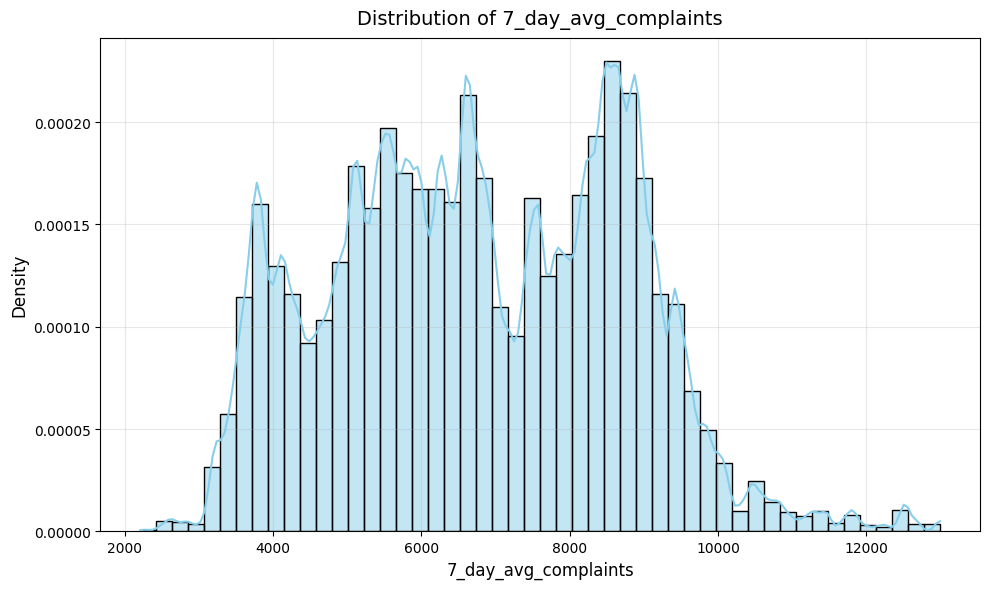

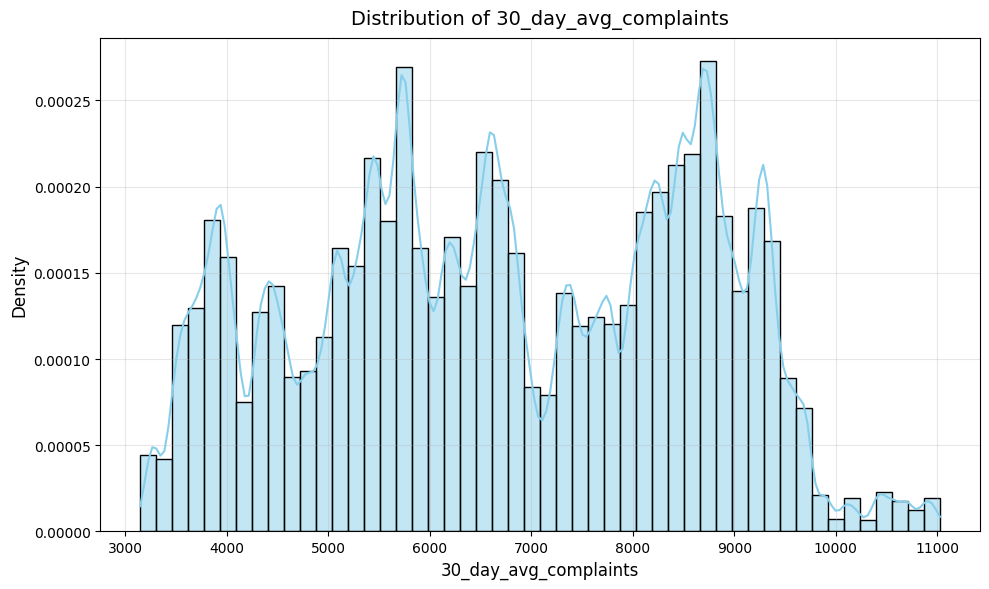

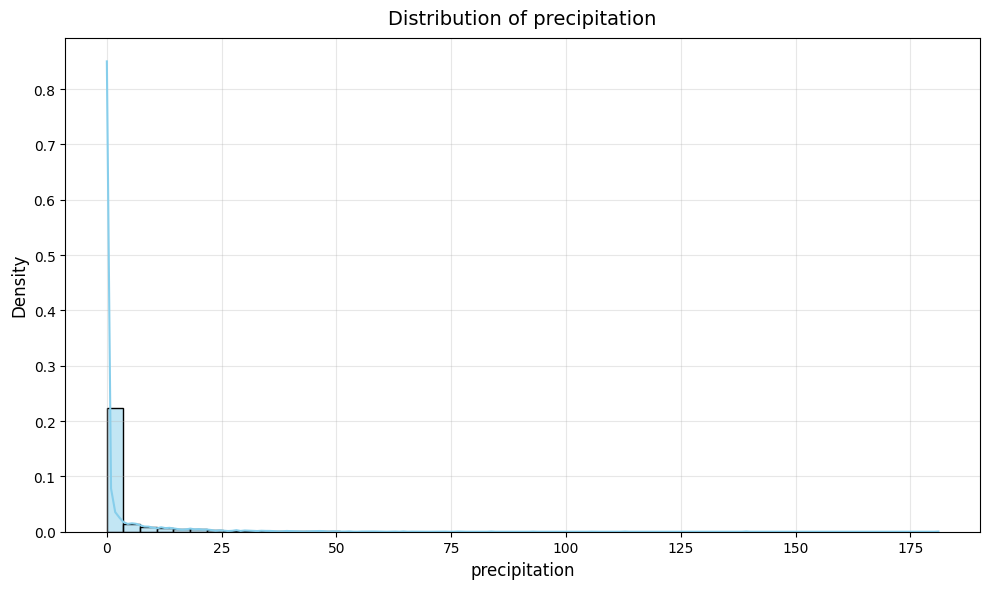

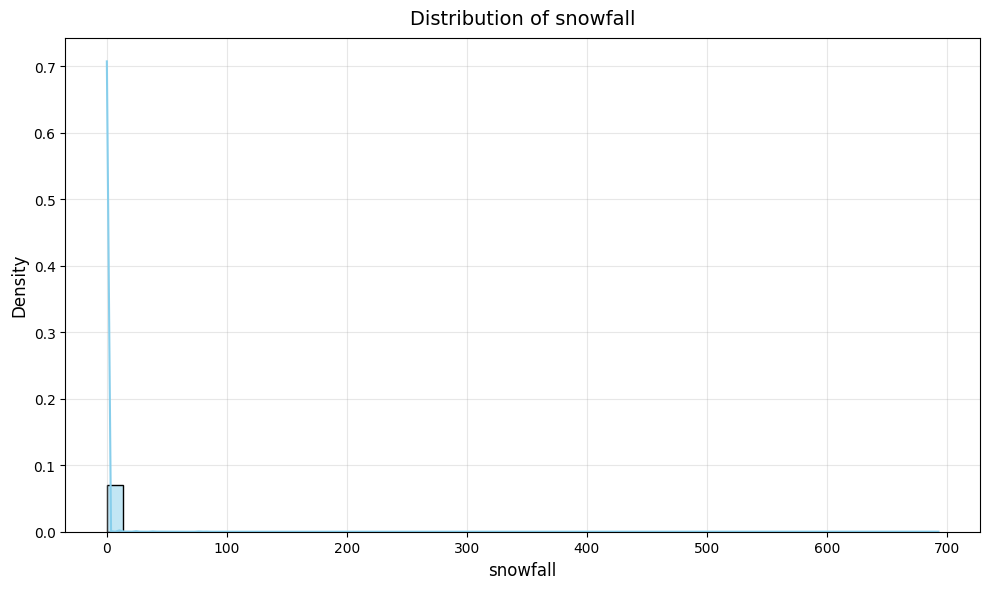

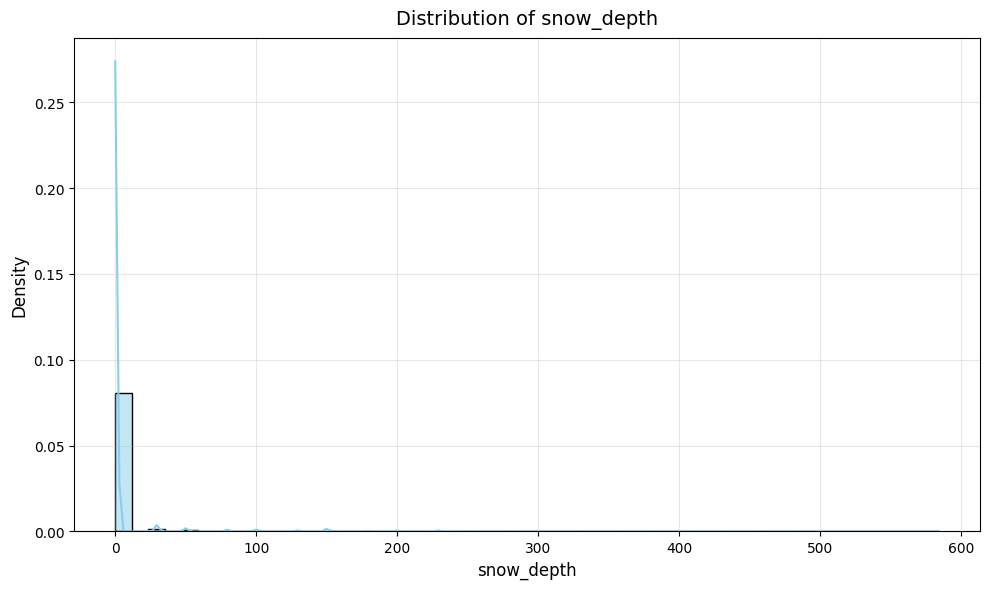

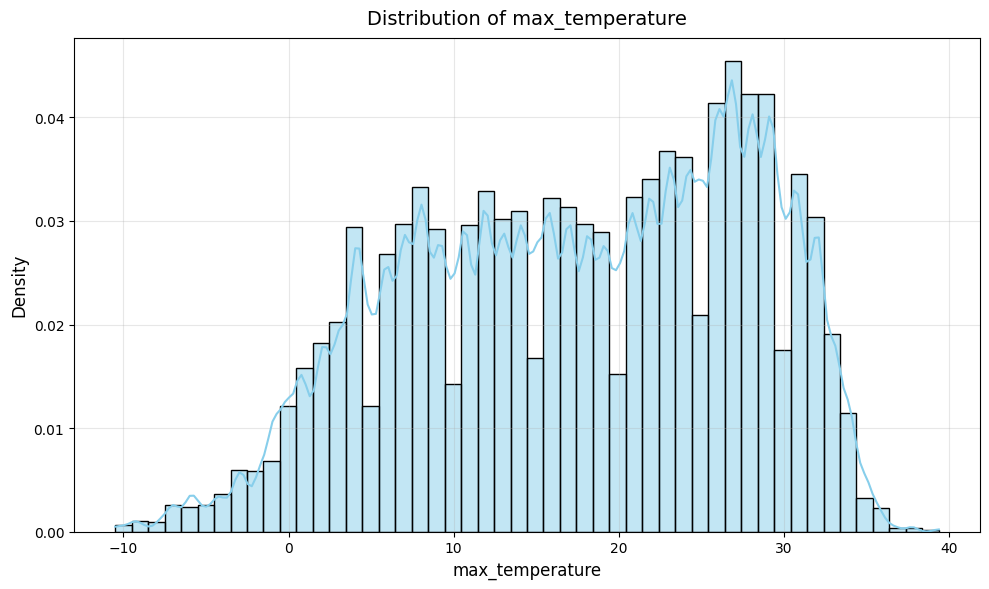

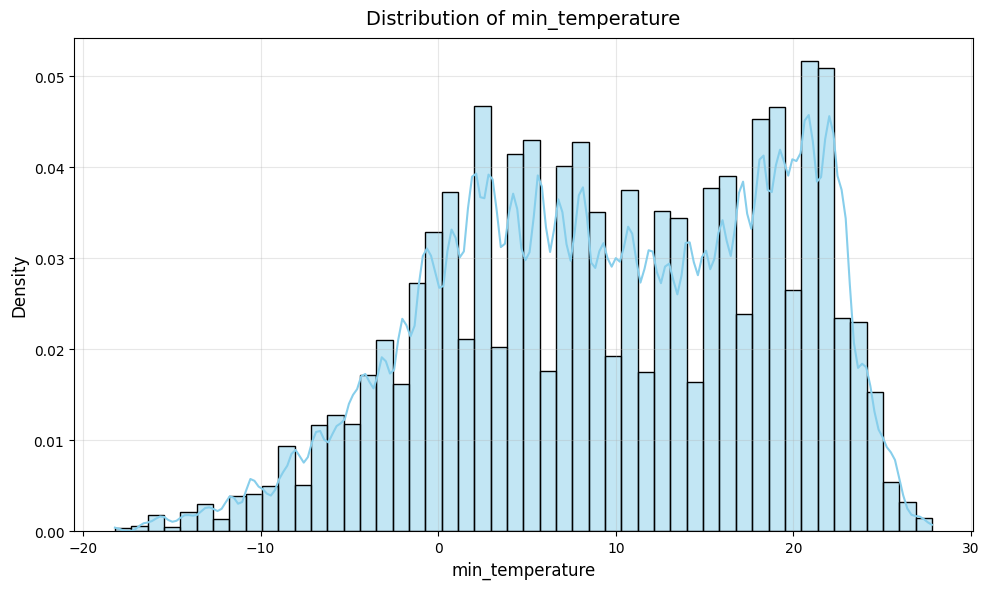

In [8]:
# --- 3. Column Distributions ---
# Define numerical columns (adjust these based on your dataset)
numerical_cols = ['response_time_hours', 'latitude', 'longitude', 'daily_complaints', 
                  '7_day_avg_complaints', '30_day_avg_complaints', 'precipitation', 
                  'snowfall', 'snow_depth', 'max_temperature', 'min_temperature']

# Plot histograms with KDE for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].to_numpy(), bins=50, kde=True, color='skyblue', stat='density')
    plt.title(f'Distribution of {col}', fontsize=14, pad=10)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
import polars as pl

# Summary statistics for response_time_hours
response_stats = df.select([
    pl.col('response_time_hours').mean().alias('mean'),
    pl.col('response_time_hours').median().alias('median'),
    pl.col('response_time_hours').min().alias('min'),
    pl.col('response_time_hours').max().alias('max'),
    pl.col('response_time_hours').std().alias('std_dev'),
    pl.col('response_time_hours').var().alias('variance'),
    pl.col('response_time_hours').n_unique().alias('unique_values'),
    pl.col('response_time_hours').count().alias('count')
])
print("Summary Statistics for response_time_hours:\n", response_stats)



Summary Statistics for response_time_hours:
 shape: (1, 8)
┌────────────┬───────────┬─────┬────────┬────────────┬───────────────┬───────────────┬──────────┐
│ mean       ┆ median    ┆ min ┆ max    ┆ std_dev    ┆ variance      ┆ unique_values ┆ count    │
│ ---        ┆ ---       ┆ --- ┆ ---    ┆ ---        ┆ ---           ┆ ---           ┆ ---      │
│ f64        ┆ f64       ┆ f64 ┆ f64    ┆ f64        ┆ f64           ┆ u32           ┆ u32      │
╞════════════╪═══════════╪═════╪════════╪════════════╪═══════════════╪═══════════════╪══════════╡
│ 242.216751 ┆ 22.912222 ┆ 0.0 ┆ 8760.0 ┆ 751.289235 ┆ 564435.514313 ┆ 3596204       ┆ 30561281 │
└────────────┴───────────┴─────┴────────┴────────────┴───────────────┴───────────────┴──────────┘
IQR Bounds: Lower = -203.86069444444445, Upper = 344.06708333333336


In [ ]:
# Box plot for response_time_hours
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['response_time_hours'].to_pandas(), color='skyblue')
plt.title('Box Plot of Response Time (Hours)', fontsize=14, pad=10)
plt.xlabel('Response Time (Hours)', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:

sns.histplot(filtered_df["response_time_hours"], bins=100, kde=True)
plt.title("Distribution of Response Time After Outlier Removal")
plt.xlabel("Response Time (hours)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
df = df.with_columns(
    pl.col("response_time_hours").log1p().alias("log_response_time_hours")
)

In [ ]:
# Plot the transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['log_response_time_hours'].to_pandas(), bins=100, kde=True, color='skyblue', stat='density')
plt.title('Distribution of Log-Transformed Response Time (Hours)', fontsize=14, pad=10)
plt.xlabel('Log(Response Time + 1)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Histogram with a zoomed-in range
plt.figure(figsize=(10, 6))
sns.histplot(df.filter(pl.col('response_time_hours') <= 500)['response_time_hours'].to_pandas(), 
             bins=50, kde=True, color='skyblue', stat='density')
plt.title('Distribution of Response Time (Hours) [0-500 Hours]', fontsize=14, pad=10)
plt.xlabel('Response Time (Hours)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Define categorical columns (adjust based on dataset)
categorical_cols = ['borough', 'agency', 'complaint_type', 'location_type', 'open_data_channel_type']

# Plot bar plots for categorical columns
for col in categorical_cols:
    counts = df[col].value_counts().sort("count", descending=True).to_pandas()  # FIXED sorting
    plt.figure(figsize=(12, 6))
    sns.barplot(x=col, y="count", data=counts.head(10), palette="viridis")  # Use "count" column
    plt.title(f'Top 10 Frequencies of {col}', fontsize=14, pad=10)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Counts', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
# Group by complaint_type and calculate mean response time
complaint_response = (
    df.group_by('complaint_type')
    .agg(pl.col('response_time_hours').mean().alias('avg_response_time'))
    .sort('avg_response_time', descending=True)
)
print("Top 10 Complaint Types by Average Response Time:\n", complaint_response.head(10))


In [ ]:

# Box plot by complaint_type (top 10 complaint types by frequency)
top_complaints = df['complaint_type'].value_counts().sort(by='counts', descending=True).head(10)['complaint_type'].to_list()
plt.figure(figsize=(12, 6))
sns.boxplot(x='complaint_type', y='response_time_hours', 
            data=df.filter(pl.col('complaint_type').is_in(top_complaints)).to_pandas())
plt.title('Response Time by Complaint Type (Top 10)', fontsize=14, pad=10)
plt.xlabel('Complaint Type', fontsize=12)
plt.ylabel('Response Time (Hours)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# reponse time plots

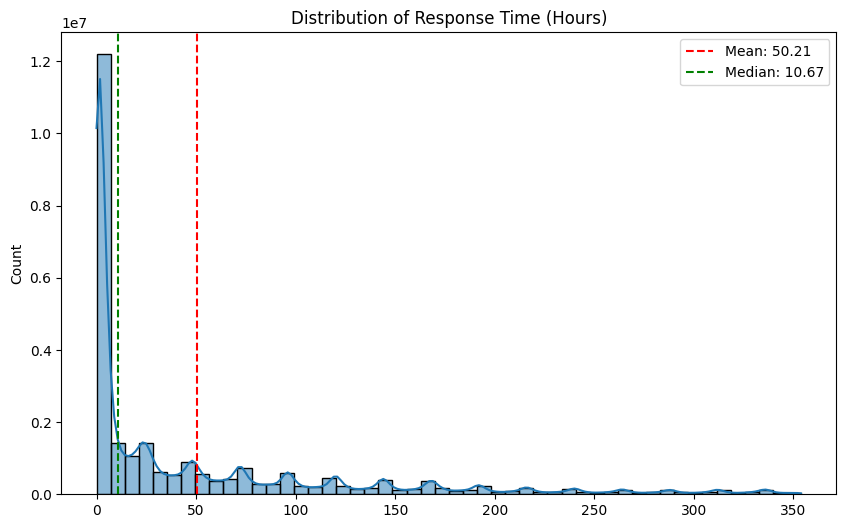

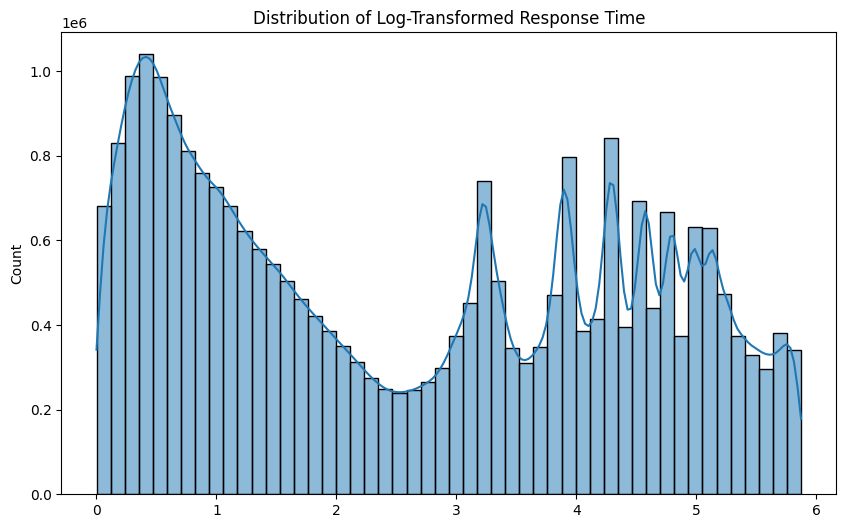

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import numpy as np

# 1. Analyze target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['response_time_hours'], bins=50, kde=True)
plt.title('Distribution of Response Time (Hours)')
plt.axvline(df['response_time_hours'].mean(), color='red', linestyle='--', label=f'Mean: {df["response_time_hours"].mean():.2f}')
plt.axvline(df['response_time_hours'].median(), color='green', linestyle='--', label=f'Median: {df["response_time_hours"].median():.2f}')
plt.legend()
plt.show()

# Check if log transformation would normalize distribution
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['response_time_hours']), bins=50, kde=True)
plt.title('Distribution of Log-Transformed Response Time')
plt.show()

In [3]:
missing_counts = df.select(
    pl.col('7_day_avg_complaints').is_null().sum(),
    pl.col('30_day_avg_complaints').is_null().sum(),
    pl.col('7_day_avg_response').is_null().sum(),
    pl.col('30_day_avg_response').is_null().sum(),
    pl.col('7_day_avg_type_complaints').is_null().sum(),
    pl.col('30_day_avg_type_complaints').is_null().sum(),
)
print(missing_counts)

shape: (1, 6)
┌────────────────┬────────────────┬────────────────┬───────────────┬───────────────┬───────────────┐
│ 7_day_avg_comp ┆ 30_day_avg_com ┆ 7_day_avg_resp ┆ 30_day_avg_re ┆ 7_day_avg_typ ┆ 30_day_avg_ty │
│ laints         ┆ plaints        ┆ onse           ┆ sponse        ┆ e_complaints  ┆ pe_complaints │
│ ---            ┆ ---            ┆ ---            ┆ ---           ┆ ---           ┆ ---           │
│ u32            ┆ u32            ┆ u32            ┆ u32           ┆ u32           ┆ u32           │
╞════════════════╪════════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╡
│ 17780          ┆ 76213          ┆ 17780          ┆ 76213         ┆ 37210         ┆ 163185        │
└────────────────┴────────────────┴────────────────┴───────────────┴───────────────┴───────────────┘


In [3]:
# Assuming 'df' is your Polars DataFrame
df = df.filter(
    pl.col('7_day_avg_complaints').is_not_null( )&
    pl.col('30_day_avg_complaints').is_not_null( )&
    pl.col('7_day_avg_response').is_not_null( )&
    pl.col('30_day_avg_response').is_not_null( )&
    pl.col('7_day_avg_type_complaints').is_not_null( )&
    pl.col('30_day_avg_type_complaints').is_not_null( )
)

## getting faeture corrolations with target variable

In [ ]:
numeric_cols = df.select(pl.selectors.numeric()).columns

In [12]:
# remove response_time_hours, response_time_seconds  response_time_minutes  
numeric_cols = [col for col in numeric_cols if col not in ['response_time_seconds', 'response_time_minutes']]

In [ ]:

correlations = df.select(numeric_cols).corr()


In [14]:

# Extract correlations with response_time_hours
df_target_corrs = pl.from_dict({
    'feature': correlations.columns,
    'correlation': correlations['response_time_hours'].to_list()
})
df_target_corrs = df_target_corrs.with_columns(
    pl.col('correlation').abs()
).sort('correlation', descending=True)
top_corrs = df_target_corrs.head(20)
print("Top correlations:\n", top_corrs)

Top correlations:
 shape: (20, 2)
┌───────────────────────┬─────────────┐
│ feature               ┆ correlation │
│ ---                   ┆ ---         │
│ str                   ┆ f64         │
╞═══════════════════════╪═════════════╡
│ response_time_hours   ┆ 1.0         │
│ escalation_threshold  ┆ 0.684558    │
│ agency_freq           ┆ 0.473954    │
│ agency_backlog        ┆ 0.392537    │
│ complaint_type_freq   ┆ 0.380662    │
│ …                     ┆ …           │
│ 30_day_avg_complaints ┆ 0.150972    │
│ 7_day_avg_complaints  ┆ 0.144483    │
│ hour                  ┆ 0.133819    │
│ created_hour          ┆ 0.133819    │
│ daily_complaints      ┆ 0.12733     │
└───────────────────────┴─────────────┘


In [15]:
import plotly.graph_objects as go
import polars as pl

# Convert top_corrs to Pandas for Plotly compatibility
top_corrs_pandas = top_corrs.to_pandas()

# Create a color scale based on correlation values
# Normalize correlations to map to a color gradient (0 to 1)
min_corr = top_corrs_pandas['correlation'].min()
max_corr = top_corrs_pandas['correlation'].max()
colors = [
    f'rgb({int(50 + (corr - min_corr) / (max_corr - min_corr) * 205)}, 100, 150)'
    for corr in top_corrs_pandas['correlation']
]

# Create the horizontal bar chart
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=top_corrs_pandas['correlation'],
        y=top_corrs_pandas['feature'],
        orientation='h',
        marker=dict(
            color=top_corrs_pandas['correlation'],
            colorscale='Blues',  # Use a blue gradient
            showscale=True,  # Show color scale on the side
            colorbar=dict(
                title="Correlation",
                thickness=15,
                len=0.5,
                yanchor="middle",
                y=0.5
            )
        ),
        text=top_corrs_pandas['correlation'].round(3),  # Display rounded correlation on bars
        textposition='auto',  # Automatically position text on bars
        hovertemplate='<b>%{y}</b><br>Correlation: %{x:.3f}<extra></extra>'  # Custom hover info
    )
)

# Update layout for better aesthetics
fig.update_layout(
    title=dict(
        text="Top 20 Features Correlated with Response Time Hours",
        x=0.5,  # Center the title
        xanchor='center',
        font=dict(size=20)
    ),
    xaxis=dict(
        title="Absolute Correlation",
        range=[0, 1.1 * top_corrs_pandas['correlation'].max()],  # Add padding to x-axis
        tickformat=".2f"
    ),
    yaxis=dict(
        title="Feature",
        autorange="reversed",  # Ensure highest correlation is at the top
        tickfont=dict(size=12)
    ),
    height=600,  # Adjust height for 20 bars
    width=900,
    margin=dict(l=200, r=50, t=100, b=50),  # Adjust margins for better spacing
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=14),
    showlegend=False
)

# Add gridlines for better readability
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()

In [5]:
# save df as checkpoint
df.write_csv("../NYC_311_Data/outputs/nyc_311_eda_cleaned.csv")

## Model prep

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import polars as pl


In [ ]:

# Convert to pandas for sklearn compatibility
df_pd = df.to_pandas()


In [ ]:
import gc
# After using a large dataframe
del df
gc.collect()

0

In [8]:

# 1. Remove all response time columns except the target
cols_to_drop = ['response_time_minutes', 'response_time_seconds'] 
features_df = df_pd.drop(cols_to_drop, axis=1)


In [8]:
# save features_df 
features_df.to_parquet('checkpoint.parquet', index = False, engine='pyarrow')

In [ ]:
# READ features_df
features_df = pl.read_parquet('checkpoint.parquet')

In [3]:
columns_to_drop = [
    'winter_DOE', 'winter_3-1-1', 'winter_DOB', 'winter_HPD', 'winter_OTI',
    'winter_NYCEM', 'winter_DPR', 'winter_DOITT', 'winter_DOHMH', 'winter_NYPD',
    'spring_DOB', 'spring_NYPD', 'spring_DCWP', 'spring_TLC', 'spring_DOT',
    'spring_EDC', 'spring_OTI', 'spring_HRA', 'spring_DOHMH', 'spring_DEP',
    'summer_NYCEM', 'summer_DFTA', 'summer_DOT', 'summer_DOF', 'summer_DCWP',
    'summer_DOITT', 'summer_DOHMH', 'summer_DOE', 'summer_TLC', 'summer_DHS',
    'fall_DEP', 'fall_DHS', 'fall_DOHMH', 'fall_OTI', 'fall_DOITT', 'fall_DPR',
    'fall_DSNY', 'fall_OSE', 'fall_NYPD', 'fall_DFTA',
    'precipitation', 'snowfall', 'snow_depth', 'max_temperature', 'min_temperature',
    'fog', 'heavy_fog', 'thunder', 'ice_pellets', 'hail', 'glaze', 'dust',
    'smoke_haze', 'blowing_snow', 'high_winds', 'mist', 'drizzle', 'rain',
    'freezing_rain', 'snow', 'unknown_precip', 'ice_fog','borough', 'created_hour'
]
features_df = features_df.drop(columns_to_drop)

### cat column encoding

In [4]:
categorical_cols = [col for col in features_df.columns if features_df[col].dtype == pl.Utf8]
categorical_cols

['agency',
 'complaint_type',
 'descriptor',
 'location_type',
 'incident_zip',
 'open_data_channel_type',
 'community_board',
 'season',
 'time_of_day']

In [5]:
# Step 2: Target encoding for high-cardinality columns (>10 unique values)
high_cardinality_cols = [col for col in categorical_cols if features_df[col].n_unique() > 10]
for col in high_cardinality_cols:
    # Compute mean response time per category
    mean_response = features_df.group_by(col).agg(pl.mean('response_time_hours').alias(f'{col}_mean'))
    # Join the means back to the original DataFrame
    features_df = features_df.join(mean_response, on=col, how='left')
    # Fill nulls with overall mean of response_time_hours
    overall_mean = features_df['response_time_hours'].mean()
    features_df = features_df.with_columns(pl.col(f'{col}_mean').fill_null(overall_mean))
    # Drop the original categorical column
    features_df = features_df.drop(col)

In [6]:
# Step 3: One-hot encoding for low-cardinality columns (<=10 unique values)
low_cardinality_cols = [col for col in categorical_cols if col not in high_cardinality_cols]
for col in low_cardinality_cols:
    # Convert to dummies (binary columns)
    dummies = features_df[col].to_dummies()
    # Horizontally stack the dummy columns to the DataFrame
    features_df = features_df.hstack(dummies)
    # Drop the original column
    features_df = features_df.drop(col)

In [ ]:
# Step 7: Convert full dataset to pandas for final training
features_df_pd = features_df.to_pandas()

### keeping only needed columns

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd

top_features = [
    'is_likely_escalated', 'descriptor_mean', 'complaint_type_mean', 'priority_score',
    'escalation_threshold', 'pre_covid', 'weekend_emergency_agency', 'school_in_session',
    'day_of_week', 'daily_avg_response', 'borough_QUEENS', 'borough_MANHATTAN',
    '7_day_avg_response', 'post_major_covid', 'open_data_channel_type_UNKNOWN',
    'hourly_concurrent_count', 'borough_BRONX', 'agency_mean', 'agency_backlog',
    'season_Spring', 'is_weather_sensitive', '30_day_avg_complaints', 'descriptor_freq',
    'covid_lockdown', 'cold_heat_complaint_interaction', 'historical_escalation_rate',
    'open_data_channel_type_MOBILE', '30_day_avg_response', 'days_to_next_holiday',
    'location_type_mean', 'season_Winter', '7_day_avg_complaints', 'is_street_related_complaint',
    'agency_freq', '30_day_avg_borough_complaints', '7_day_avg_type_complaints',
    'is_safety_related', '30_day_avg_type_complaints', 'borough_BROOKLYN',
    'complaint_type_freq', 'snow_street_interaction', 'is_heat_related_complaint',
    'covid_omicron', 'covid_delta', 'weekend_non_emergency_agency', 'week_number',
    '7_day_avg_borough_complaints', 'daily_complaints', 'hour', 'open_data_channel_type_OTHER'
]



# Assuming features_df_pd is your pandas DataFrame with the data
X = features_df_pd[top_features]  # Select the top features as input
y = features_df_pd['response_time_hours']  # Target variable


### preparing  data for training and training the model

In [9]:

# Step 1: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import optuna
import subprocess
import time
import os
import warnings
warnings.filterwarnings('ignore')

# Function to check GPU usage
def check_gpu_usage():
    try:
        result = subprocess.run(['nvidia-smi'], stdout=subprocess.PIPE, text=True)
        print("\nGPU STATUS:")
        print(result.stdout)
        return True
    except Exception as e:
        print(f"Error checking GPU: {e}")
        return False

# Test if XGBoost can use GPU
def test_gpu_availability():
    print("Testing GPU availability for XGBoost...")
    try:
        X = np.random.rand(1000, 10)
        y = np.random.rand(1000)
        model = xgb.XGBRegressor(tree_method='hist', device='cuda')
        model.fit(X, y)
        print("✅ XGBoost successfully used GPU!")
        return True
    except Exception as e:
        print(f"❌ XGBoost GPU test failed: {e}")
        return False

# Simple objective function to avoid errors
def simple_objective(trial, X, y, tree_method, device):
    # Fixed params - NO LOG SCALE FOR PARAMETERS THAT CAN BE ZERO
    params = {
        'tree_method': tree_method,
        'device': device,
        'verbosity': 0,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.001, 1.0),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 1, 10)
    }
    
    # K-fold Cross validation
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    cv_scores = []
    for train_idx, val_idx in kf.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        # Train model - FIXED API USAGE
        try:
            # Create model
            model = xgb.XGBRegressor(**params)
            
            # Fit without early stopping (for compatibility)
            model.fit(X_train_fold, y_train_fold)
            
            # Predict and calculate MAE
            y_pred = model.predict(X_val_fold)
            mae = mean_absolute_error(y_val_fold, y_pred)
            cv_scores.append(mae)
        except Exception as e:
            print(f"Error in fold training: {e}")
            return float('inf')
    
    return np.mean(cv_scores)

def find_best_params_simple(X_train, y_train, n_trials=20):
    """Simplified parameter search to avoid Optuna errors"""
    # Check GPU
    print("\n======= GPU VERIFICATION =======")
    gpu_available = check_gpu_usage()
    xgb_gpu_works = test_gpu_availability()
    
    # Set device based on GPU availability
    device = 'cuda' if xgb_gpu_works else 'cpu'
    tree_method = 'hist'
    
    print(f"\nUsing device: {device}")
    print(f"Using tree_method: {tree_method}")
    
    # Sample data
    sample_size = min(1_000_000, len(X_train))
    if len(X_train) > sample_size:
        print(f"\nSampling {sample_size} rows from {len(X_train)} for hyperparameter tuning")
        indices = np.random.choice(len(X_train), sample_size, replace=False)
        X_train_sample = X_train.iloc[indices]
        y_train_sample = y_train.iloc[indices]
    else:
        X_train_sample = X_train
        y_train_sample = y_train
    
    # Create optuna study
    start_time = time.time()
    study = optuna.create_study(direction="minimize")
    
    # Run optimization
    try:
        study.optimize(
            lambda trial: simple_objective(trial, X_train_sample, y_train_sample, tree_method, device),
            n_trials=n_trials,
            show_progress_bar=True
        )
        
        # Get best parameters
        best_params = study.best_params
        best_params['tree_method'] = tree_method
        best_params['device'] = device
        
        print(f"\n======= BEST TRIAL =======")
        print(f"Value (MAE): {study.best_value:.4f}")
        print(f"Params: {best_params}")
        
    except Exception as e:
        print(f"Error during optimization: {e}")
        best_params = {
            'learning_rate': 0.1,
            'n_estimators': 200,
            'max_depth': 6,
            'min_child_weight': 1,
            'gamma': 0.01,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'reg_alpha': 0.01,
            'reg_lambda': 1.0,
            'tree_method': tree_method,
            'device': device
        }
    
    # End timing
    time_taken = time.time() - start_time
    print(f"Time taken: {time_taken:.2f} seconds")
    
    return best_params, time_taken, tree_method, device

In [37]:
# Run the simplified parameter search
best_params, time_taken, tree_method, device = find_best_params_simple(
    X_train=X_train,
    y_train=y_train,
    n_trials=30  # Start with fewer trials to verify it works
)
# Print the best parameters
print("Best parameters found:", best_params)
print(f"Time taken: {time_taken:.2f} seconds")


======= GPU VERIFICATION =======

GPU STATUS:
Tue Mar 25 23:08:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.16                 Driver Version: 572.16         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8              9W /  160W |     304MiB /  16376MiB |      0%      Default |
|                                         |                        |                  N/A |
+

[I 2025-03-25 23:08:11,604] A new study created in memory with name: no-name-c4a866e4-8728-4edd-be3a-be9b30c9f254


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-03-25 23:08:18,008] Trial 0 finished with value: 22.5931887141645 and parameters: {'learning_rate': 0.2028353983778377, 'n_estimators': 134, 'max_depth': 10, 'min_child_weight': 10, 'gamma': 0.7961890619708538, 'subsample': 0.7895368939834039, 'colsample_bytree': 0.8645294671084152, 'reg_alpha': 8.997883188468544, 'reg_lambda': 8.904982137613729}. Best is trial 0 with value: 22.5931887141645.
[I 2025-03-25 23:08:22,214] Trial 1 finished with value: 23.951378318231523 and parameters: {'learning_rate': 0.13445433494902703, 'n_estimators': 388, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0.8956766818272809, 'subsample': 0.6448478861850128, 'colsample_bytree': 0.7836705491534305, 'reg_alpha': 2.7011983205056302, 'reg_lambda': 3.734525881680862}. Best is trial 0 with value: 22.5931887141645.
[I 2025-03-25 23:08:27,072] Trial 2 finished with value: 23.41971117294607 and parameters: {'learning_rate': 0.033112112597011086, 'n_estimators': 110, 'max_depth': 9, 'min_child_weight': 8,

In [38]:
def train_final_model_no_val(X_train, y_train, best_params, test_size=0.2, random_state=42):
    """
    Train final model with best parameters, creating a validation split automatically
    
    Parameters:
    -----------
    X_train : DataFrame
        Training features
    y_train : Series
        Training target
    best_params : dict
        Best parameters found during hyperparameter tuning
    test_size : float, default=0.2
        Proportion of data to use for validation
    random_state : int, default=42
        Random seed for reproducibility
        
    Returns:
    --------
    model : XGBRegressor
        Trained model
    mae, rmse, r2 : float
        Performance metrics
    training_time : float
        Time taken for training in seconds
    """
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import xgboost as xgb
    import time
    
    # Create a validation split from the training data
    X_train_split, X_val, y_train_split, y_val = train_test_split(
        X_train, y_train, test_size=test_size, random_state=random_state)
    
    print(f"Training on {len(X_train_split)} samples, validating on {len(X_val)} samples")
    
    # Create model with best parameters
    model = xgb.XGBRegressor(**best_params)
    
    # Start timing
    start_time = time.time()
    
    # Train model on the training split
    model.fit(X_train_split, y_train_split)
    
    # End timing
    training_time = time.time() - start_time
    
    # Evaluate on validation split
    y_pred = model.predict(X_val)
    
    # Calculate metrics
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    
    print("\n======= VALIDATION PERFORMANCE =======")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"Training time: {training_time:.2f} seconds")
    
    # Now train on all data for the final model
    print("\nTraining final model on all data...")
    final_start_time = time.time()
    
    final_model = xgb.XGBRegressor(**best_params)
    final_model.fit(X_train, y_train)
    
    final_training_time = time.time() - final_start_time
    print(f"Final model training time: {final_training_time:.2f} seconds")
    
    return final_model, mae, rmse, r2, training_time

In [39]:
# Train the final model
model, mae, rmse, r2, training_time = train_final_model_no_val(
    X_train=X_train,
    y_train=y_train,
    best_params=best_params
)

Training on 14563680 samples, validating on 3640921 samples

======= VALIDATION PERFORMANCE =======
MAE: 20.9614
RMSE: 38.4568
R²: 0.7426
Training time: 59.52 seconds

Training final model on all data...
Final model training time: 71.18 seconds


In [42]:
model.save_model("final_xgboost_model.json")  # Saves in JSON format (recommended)


Text(0.5, 1.0, 'Top Factors Affecting NYC Service Request Response Times')

<Figure size 1000x600 with 0 Axes>

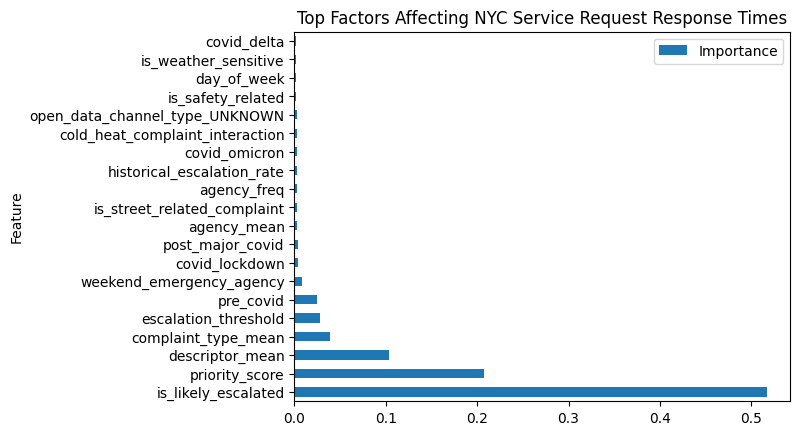

In [44]:
# save the model
# Get feature importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
importance_df.head(20).plot(kind='barh', x='Feature', y='Importance')
plt.title('Top Factors Affecting NYC Service Request Response Times')

In [11]:
import xgboost as xgb

# Load the saved model
loaded_model = xgb.Booster()
loaded_model.load_model("final_xgboost_model.json")


In [12]:

# Convert X_test to DMatrix format (required for Booster)
dtest = xgb.DMatrix(X_test)


In [13]:

# Make predictions
y_pred = loaded_model.predict(dtest)


### plots to check the outputs and extra analysis

### plots to check the outputs and extra analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a DataFrame with your predictions and actual values
results_df = X_test.copy()
results_df['predicted_response_time'] = y_pred
results_df['actual_response_time'] = y_test.values


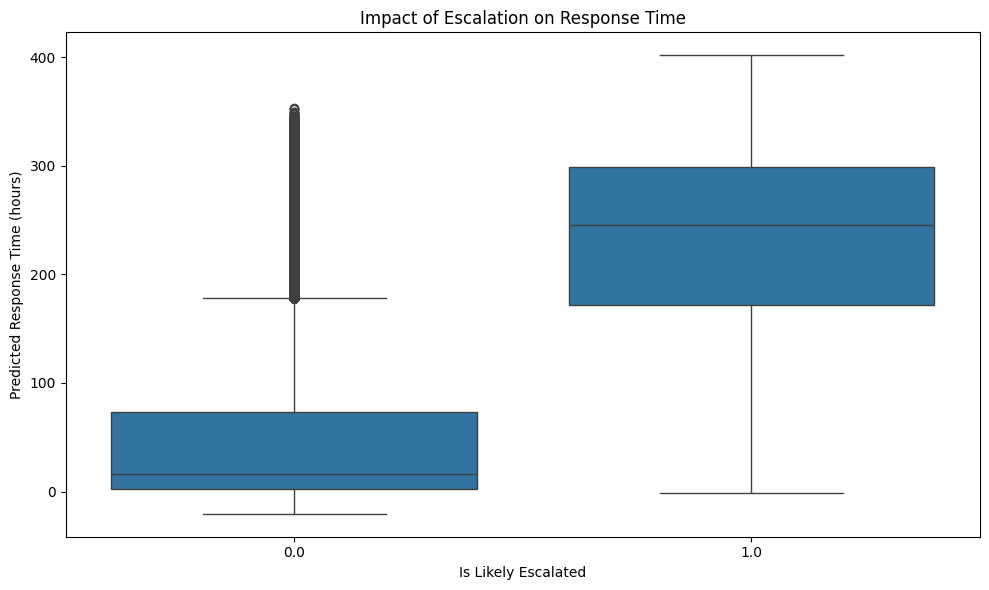

In [17]:

# Step 2: Create Key Operational Analysis

# Escalation Analysis (your most important feature)
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_likely_escalated', y='predicted_response_time', data=results_df)
plt.title('Impact of Escalation on Response Time')
plt.xlabel('Is Likely Escalated')
plt.ylabel('Predicted Response Time (hours)')
plt.tight_layout()
plt.savefig('escalation_impact.png')


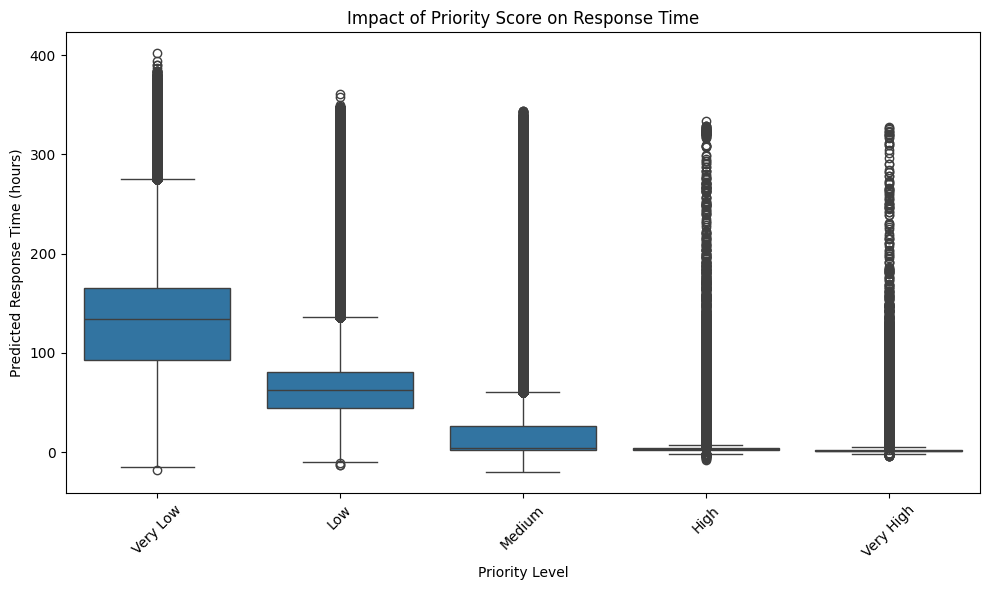

In [18]:

# Priority Analysis (second most important feature)
plt.figure(figsize=(10, 6))
# Create priority bins
results_df['priority_bin'] = pd.qcut(results_df['priority_score'], q=5, 
                                    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
sns.boxplot(x='priority_bin', y='predicted_response_time', data=results_df)
plt.title('Impact of Priority Score on Response Time')
plt.xlabel('Priority Level')
plt.ylabel('Predicted Response Time (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('priority_impact.png')


<Figure size 1200x600 with 0 Axes>

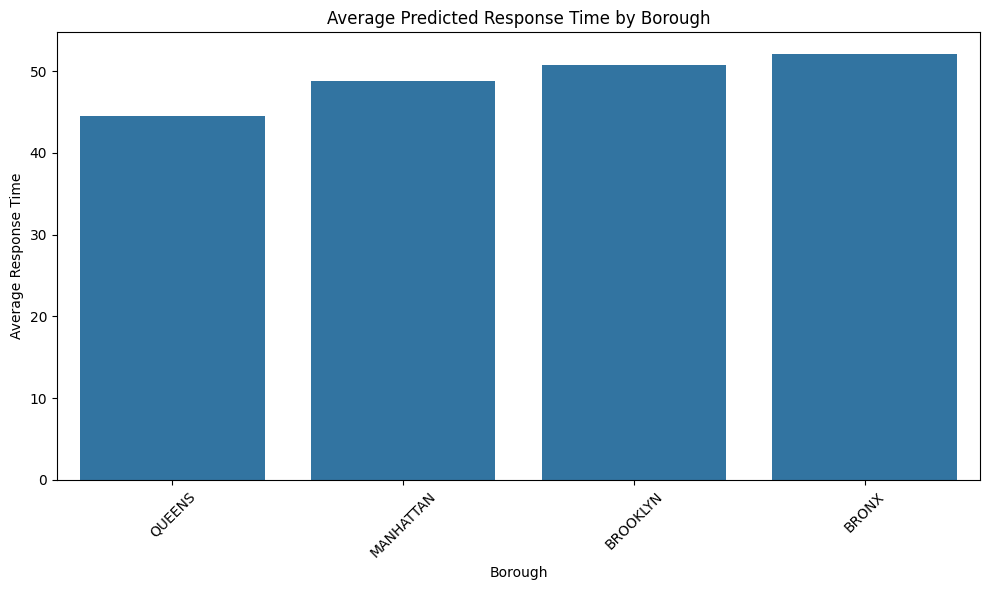

In [19]:

# Step 3: Borough Analysis
plt.figure(figsize=(12, 6))
# Extract borough information
borough_cols = [col for col in results_df.columns if col.startswith('borough_')]

# Create a series with average response time by borough
borough_response_times = {}
for col in borough_cols:
    borough_name = col.replace('borough_', '')
    # Filter for rows where this borough is 1
    borough_data = results_df[results_df[col] == 1]
    if len(borough_data) > 0:
        borough_response_times[borough_name] = borough_data['predicted_response_time'].mean()

# Create and sort borough DataFrame
borough_df = pd.DataFrame(list(borough_response_times.items()), 
                         columns=['Borough', 'Average Response Time']).sort_values('Average Response Time')

# Plot borough response times
plt.figure(figsize=(10, 6))
sns.barplot(x='Borough', y='Average Response Time', data=borough_df)
plt.title('Average Predicted Response Time by Borough')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('borough_response_times.png')

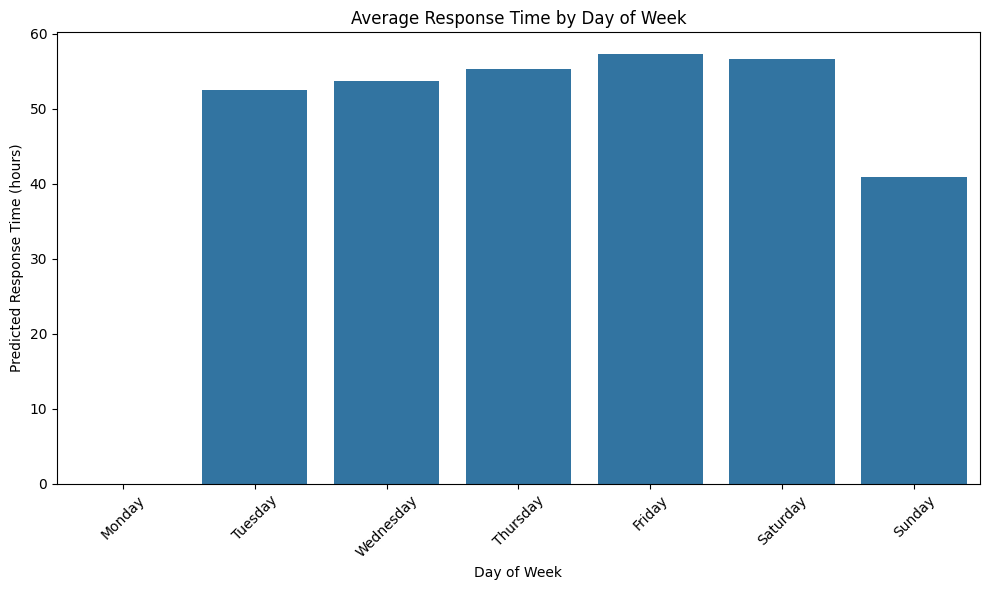

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 4: Time-based Analysis (Day of Week)
plt.figure(figsize=(10, 6))

# Compute the mean response time per day of the week
day_response = results_df.groupby('day_of_week', as_index=False)['predicted_response_time'].mean()

# Drop NaNs if they exist in 'day_of_week'
day_response = day_response.dropna(subset=['day_of_week'])

# Convert to integer (ensure valid indexing)
day_response['day_of_week'] = day_response['day_of_week'].astype(int)

# Define the mapping for days
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_response['day_name'] = day_response['day_of_week'].map(lambda x: day_names[x] if 0 <= x <= 6 else None)

# Ensure correct day order using categorical sorting
day_response['day_name'] = pd.Categorical(day_response['day_name'], categories=day_names, ordered=True)

# Sort the DataFrame to maintain proper order
day_response = day_response.sort_values('day_name')

# Plot
sns.barplot(x='day_name', y='predicted_response_time', data=day_response)
plt.title('Average Response Time by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Predicted Response Time (hours)')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.tight_layout()
plt.savefig('day_response_times.png')

plt.show()  # Show the plot


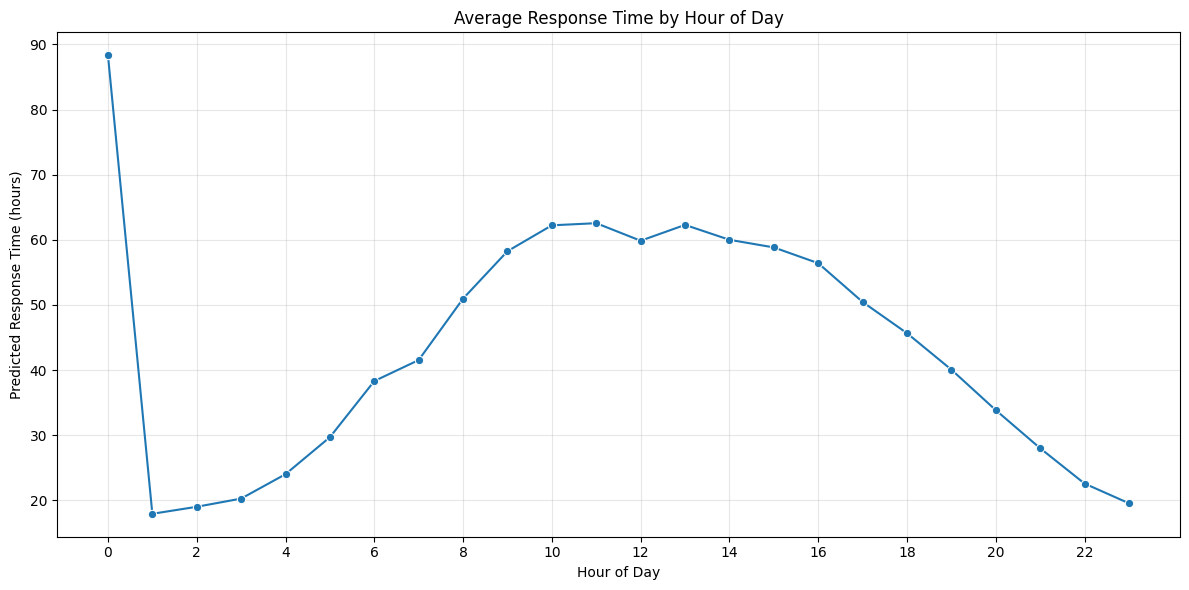

In [25]:


# Step 5: Hourly Analysis (if hour is in your features)
if 'hour' in results_df.columns:
    plt.figure(figsize=(12, 6))
    hour_response = results_df.groupby('hour')['predicted_response_time'].mean().reset_index()
    hour_response = hour_response.sort_values('hour')
    
    sns.lineplot(x='hour', y='predicted_response_time', data=hour_response, marker='o')
    plt.title('Average Response Time by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Predicted Response Time (hours)')
    plt.xticks(range(0, 24, 2))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('hour_response_times.png')


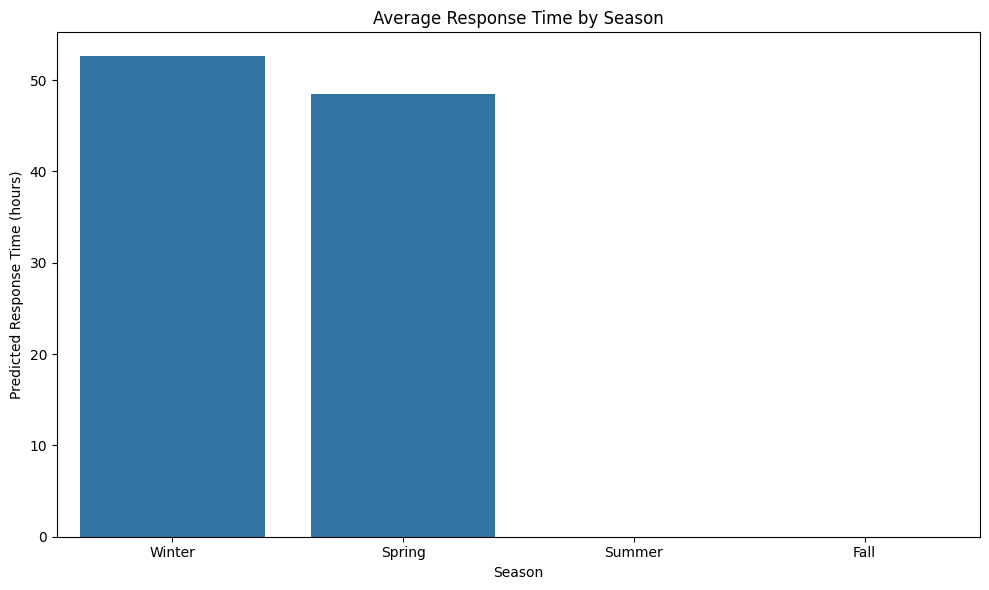

In [26]:

# Step 6: Seasonal Analysis
season_cols = [col for col in results_df.columns if col.startswith('season_')]
if season_cols:
    plt.figure(figsize=(10, 6))
    season_response_times = {}
    for col in season_cols:
        season_name = col.replace('season_', '')
        season_data = results_df[results_df[col] == 1]
        if len(season_data) > 0:
            season_response_times[season_name] = season_data['predicted_response_time'].mean()
    
    season_df = pd.DataFrame(list(season_response_times.items()), 
                           columns=['Season', 'Average Response Time'])
    
    # Define season order
    season_order = ['Winter', 'Spring', 'Summer', 'Fall']
    # Filter to keep only valid seasons and sort
    season_df = season_df[season_df['Season'].isin(season_order)]
    season_df['Season'] = pd.Categorical(season_df['Season'], categories=season_order, ordered=True)
    season_df = season_df.sort_values('Season')
    
    sns.barplot(x='Season', y='Average Response Time', data=season_df)
    plt.title('Average Response Time by Season')
    plt.ylabel('Predicted Response Time (hours)')
    plt.tight_layout()
    plt.savefig('season_response_times.png')

C:\Users\ronyr\AppData\Local\Temp\ipykernel_2508\189596432.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  complaint_response = results_df.groupby('complaint_type_category')['predicted_response_time'].mean().reset_index()


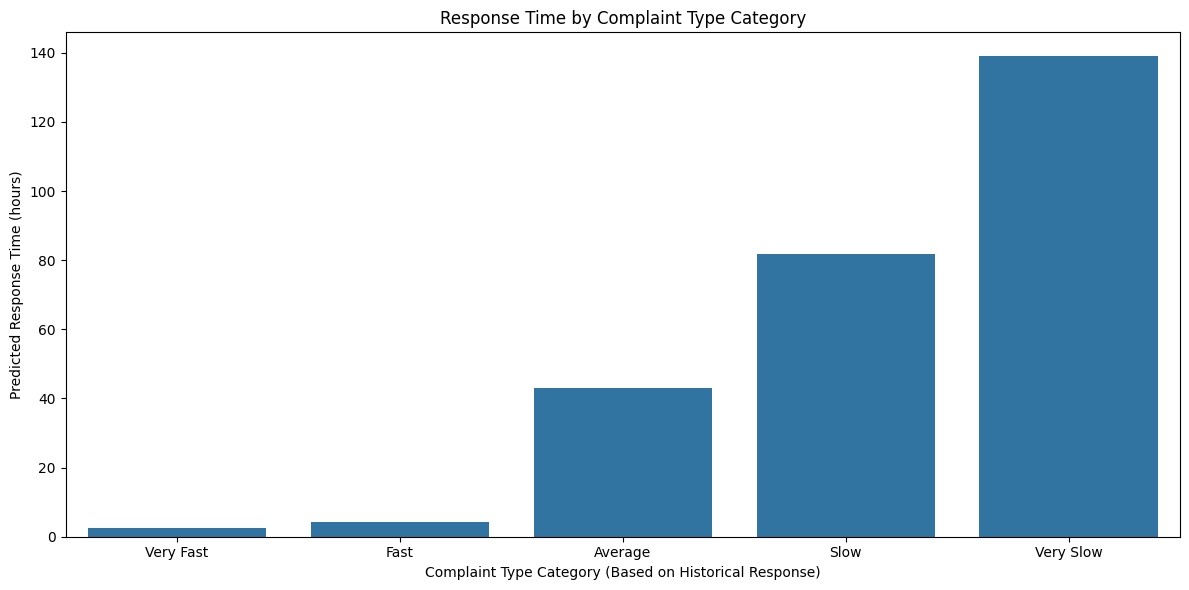

In [27]:


# Step 7: Complaint Type Analysis (using the mean encoded feature)
plt.figure(figsize=(12, 6))
# Create bins for complaint_type_mean
results_df['complaint_type_category'] = pd.qcut(results_df['complaint_type_mean'], 
                                               q=5, 
                                               labels=['Very Fast', 'Fast', 'Average', 'Slow', 'Very Slow'])

complaint_response = results_df.groupby('complaint_type_category')['predicted_response_time'].mean().reset_index()
# Sort by response time
complaint_response = complaint_response.sort_values('predicted_response_time')

sns.barplot(x='complaint_type_category', y='predicted_response_time', data=complaint_response)
plt.title('Response Time by Complaint Type Category')
plt.xlabel('Complaint Type Category (Based on Historical Response)')
plt.ylabel('Predicted Response Time (hours)')
plt.tight_layout()
plt.savefig('complaint_type_response_times.png')

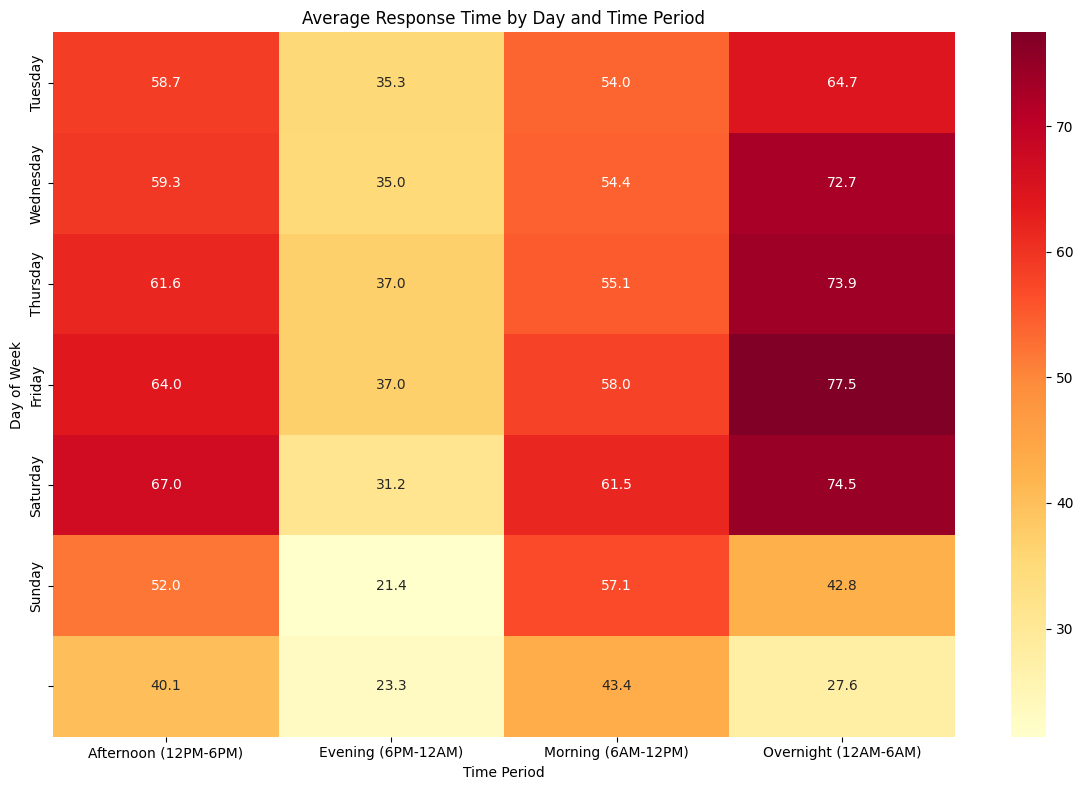

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 8: Create Operational Dashboard Table
# Combine day of week and hour for staffing recommendations
if 'hour' in results_df.columns:
    # Define time periods
    def get_period(hour):
        if 0 <= hour < 6:
            return 'Overnight (12AM-6AM)'
        elif 6 <= hour < 12:
            return 'Morning (6AM-12PM)'
        elif 12 <= hour < 18:
            return 'Afternoon (12PM-6PM)'
        else:
            return 'Evening (6PM-12AM)'

    # Apply time period categorization
    results_df['time_period'] = results_df['hour'].apply(get_period)

    # Create pivot table for day and time period
    day_time_response = pd.pivot_table(
        results_df,
        values='predicted_response_time',
        index='day_of_week',
        columns='time_period',
        aggfunc='mean'
    )

    # Drop NaNs from index and convert to integers
    day_time_response = day_time_response.dropna(axis=0, how='all')  # Remove rows where all values are NaN
    day_time_response.index = day_time_response.index.astype(int)

    # Map day numbers to names safely
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_time_response.index = day_time_response.index.map(lambda x: day_names[x] if 0 <= x <= 6 else None)

    # Save as CSV
    day_time_response.to_csv('staffing_recommendations.csv')

    # Create heatmap visualization
    plt.figure(figsize=(12, 8))
    sns.heatmap(day_time_response, annot=True, cmap='YlOrRd', fmt='.1f')
    plt.title('Average Response Time by Day and Time Period')
    plt.xlabel('Time Period')
    plt.ylabel('Day of Week')
    plt.tight_layout()
    plt.savefig('day_time_heatmap.png')

    plt.show()  # Show the plot


1. Escalation Impact (Image 1)

Critical Finding: Escalated requests take 10x longer to resolve (~250 hours vs ~20 hours)
Operational Impact: Each escalation adds over 9 days to response time
Recommendation: Implement early intervention protocols for requests showing escalation risk factors

2. Priority Score Effectiveness (Image 2)

Strong Correlation: Priority scoring is working as intended
Response Scale: Very Low (140 hrs) → Low (60 hrs) → Medium (20 hrs) → High/Very High (<5 hrs)
Recommendation: Expand use of priority scoring across more service types

3. Geographical Equity (Image 3)

Finding: Relatively small borough differences (8-hour max differential)
Insight: Queens receives fastest service (~44 hrs), Bronx slowest (~52 hrs)
Recommendation: Investigate staffing allocation in the Bronx to achieve service equity

4. Temporal Patterns (Images 4, 5, 8)

Weekly Pattern: Sunday/Monday requests resolved faster; Friday requests take longest
Hourly Finding: 1am requests receive dramatically faster service (~18 hrs vs ~60 hrs midday)
Critical Insight: Sunday evening submissions (21.4 hrs) vs. Friday overnight (77.5 hrs) - nearly 4x difference
Staffing Recommendation: Increase Friday/Saturday overnight staffing to address backlog buildup

5. Complaint Type Impact (Image 7)

Enormous Variation: 70x difference between fastest and slowest complaint categories
Response Range: Very Fast (~2 hrs) to Very Slow (~140 hrs)
Recommendation: Set citizen expectations based on complaint type data

6. Seasonal Effect (Image 6)

Winter Challenge: Winter shows longest response times (~52 hrs)
Spring Improvement: Spring shows modest improvement (~49 hrs)
Recommendation: Prepare additional winter resources, especially for weather-sensitive services